In [42]:
#Name: Becca Dura

import pandas
import sklearn
data = pandas.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [43]:
#View the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
#Check if any of the features have values that are NA
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
#Check the data types to see what variables are categorical and need to be fixed
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [46]:
#Had some issues with values in TotalCharges not converting to floats right away, so I did this to see if there were any 
#missing values
data['TotalCharges'].min()

' '

In [47]:
#Replace the missing values in TotalCharges with a 0
data2 = data.replace({'TotalCharges':' '}, 0)
#Convert values in TotalCharges to floats
data2['TotalCharges'] = pandas.to_numeric(data2['TotalCharges'])

#Checked to make sure there were not originially any 0s in TotalCharges before replacing the values I converted to 0s with the
#mean TotalCharges
data.loc[data['TotalCharges'] == 0]

#Replaced the 0s in TotalCharges with the mean TotalCharges
data3 = data2.replace({'TotalCharges':0}, data2.TotalCharges.mean())

#Made sure there were not any 0s left in TotalCharges
data3.loc[data3['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [48]:
#Created dummy variables for the categorical variables with more than 2 options
data4 = pandas.get_dummies(data3, columns = ['InternetService','Contract','PaymentMethod'])

In [49]:
#Replaced values for features with yes/no with 1/0 so the data was easier to work with
data5 = data4.replace({'Yes': 1, 'No': 0})

In [50]:
#Some yes/no features also had 'No phone service' or 'No internet service' as options, which I decided to just count as if 
#they were 'No'
data6 = data5.replace({'No phone service': 0, 'No internet service': 0})

In [51]:
#Replaced female/male in the gender feature with 0/1
data7 = data6.replace({'Female': 0, 'Male': 1})

In [52]:
#Checked the data types to see if there were any more categorical variables or variables that were not integers or floats
#customerID was the only data type that was not a float or integer, but that is okay because customerID is not a predictor
data7.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [53]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

#Split the data set into a training and testing set
(data_train, data_test) = train_test_split(data7, \
                                             test_size = 0.2)
#Set 'Churn' as the target variable and the rest of the variables as predictors (aside from 'customerID')
target = data7.columns[17]
predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

#Created a function that returns the accuracy of a k-Nearest-Neighbor model with a specific number of neighbors
def kNN(num_neighbors):    
    
    cfr = KNeighborsClassifier(n_neighbors = num_neighbors)

    cfr.fit(data_train[predictors],data_train[target])
    data_predictions = cfr.predict(data_test[predictors])

    return metrics.accuracy_score(data_test[target],\
                                data_predictions)

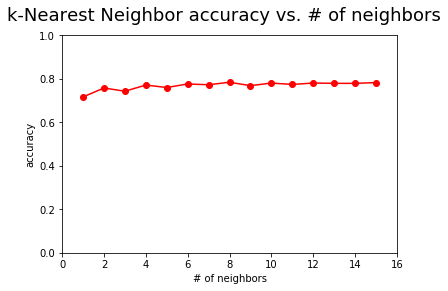

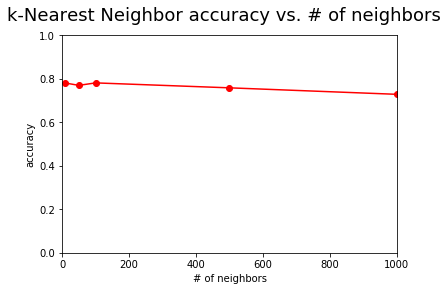

In [77]:
#Created a function that helps tune the number of neighbors in the k-Nearest-Neighbor model by plotting the 
#accuracies for various k values
def tune_number_of_neighbors(n_neighbors):
    kNN_accuracies = []

    for n in n_neighbors:
        curr_accuracy = kNN(n)
        kNN_accuracies.append(curr_accuracy)

    plt.suptitle('k-Nearest Neighbor accuracy vs. # of neighbors',fontsize=18)
    plt.xlabel('# of neighbors')
    plt.ylabel('accuracy')
    plt.plot(n_neighbors,kNN_accuracies,'ro-')
    plt.axis([0,n_neighbors[-1]+1,0,1])

    plt.show()

#Prints out plots of the accuracies for various k values
tune_number_of_neighbors([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
tune_number_of_neighbors([10,50,100,500,1000])

In [66]:
#Created a function that returns the accuracy of a decision tree model with a specific maximum number of leaf nodes
def dt(max_nodes):    
    
    dt = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = max_nodes)

    dt.fit(data_train[predictors],data_train[target])

    data_predictions = dt.predict(data_test[predictors])

    return metrics.accuracy_score(data_test[target],\
                                data_predictions)

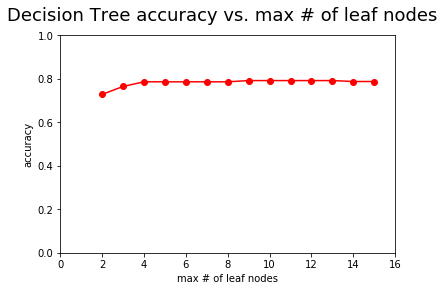

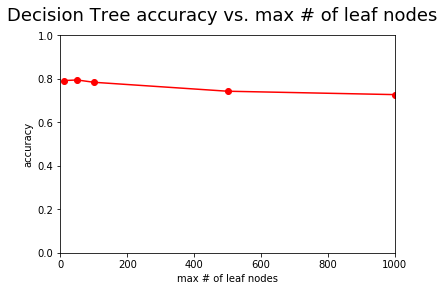

In [67]:
#Created a function that helps tune the maximum number of leaf nodes in the decision tree model by plotting the 
#accuracies for various maximum leaf node values
def tune_number_of_nodes(max_leaf_nodes):
    dt_accuracies = []

    for n in max_leaf_nodes:
        curr_accuracy = dt(n)
        dt_accuracies.append(curr_accuracy)

    plt.suptitle('Decision Tree accuracy vs. max # of leaf nodes',fontsize=18)
    plt.xlabel('max # of leaf nodes')
    plt.ylabel('accuracy')
    plt.plot(max_leaf_nodes,dt_accuracies,'ro-')
    plt.axis([0,max_leaf_nodes[-1]+1,0,1])

    plt.show()
 
#Prints out plots of the accuracies for various maximum leaf node values
tune_number_of_nodes([2,3,4,5,6,7,8,9,10,11,12,13,14,15])
tune_number_of_nodes([10,50,100,500,1000])

In [71]:
#Created a function that returns the accuracy of a random forest model with a specific number of trees
def rfc(num_trees):    
    
    rfc = RandomForestClassifier(n_estimators = num_trees)

    rfc.fit(data_train[predictors],data_train[target])

    data_predictions = rfc.predict(data_test[predictors])
  
    return metrics.accuracy_score(data_test[target],\
                                data_predictions)

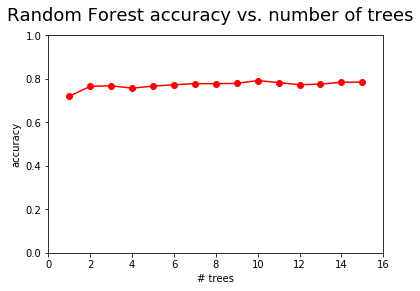

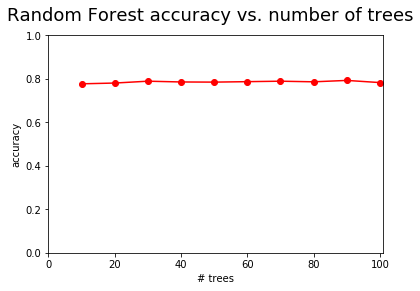

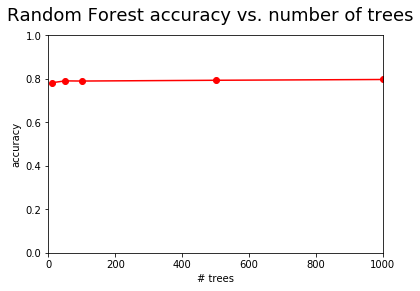

In [74]:
#Created a function that helps tune the number of trees in the random forest model by plotting the 
#accuracies for various numbers of trees 
def tune_number_of_trees(n_estimator_values):
    rfc_accuracies = []

    for n in n_estimator_values:
        curr_accuracy = rfc(n)
        rfc_accuracies.append(curr_accuracy)

    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rfc_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,0,1])

    plt.show()
  
#Prints out plots of the accuracies for various numbers of trees values
tune_number_of_trees([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
tune_number_of_trees([10,20,30,40,50,60,70,80,90,100])
tune_number_of_trees([10,50,100,500,1000])

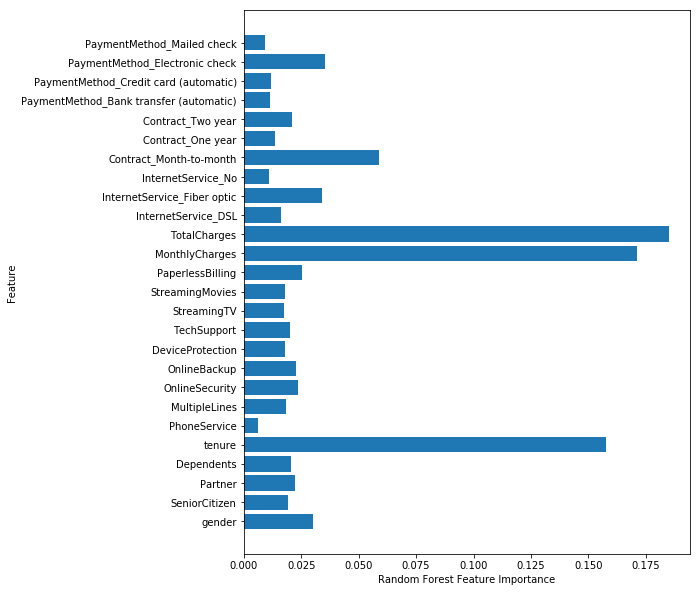

In [75]:
#Created a function that prints a bar graph showing the importance of all the features in the random forest model with a 
#maximum number of trees
def feature_importance(num_trees): 
    
    rfc = RandomForestClassifier(n_estimators = num_trees)
    
    rfc.fit(data_train[predictors],data_train[target])

    data_predictions = rfc.predict(data_test[predictors])

    index = range(len(predictors)) #creates a list of numbers the right size to use as the index

    plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
    plt.barh(index,rfc.feature_importances_,height=0.8) #horizontal bar chart
    plt.ylabel('Feature')
    plt.yticks(index,predictors) #put the feature names at the y tick marks
    plt.xlabel("Random Forest Feature Importance")
    plt.show()

#Printed out a bar graph to show the importance of the features in the random forest model with a maximum of 10 trees (the 
#value for the maximum number of trees with the highest accuracy)
feature_importance(10)

In [60]:
#Created a function that returns the accuracy of a linear model with a maximum number of iterations
def clf(max_iterations):    

    clf = Perceptron(max_iter = max_iterations)

    clf.fit(data_train[predictors],data_train[target])

    data_predictions = clf.predict(data_test[predictors])

    #print(data_predictions)
    #print(data_test['Churn'])

    #print(metrics.accuracy_score(data_test['Churn'],\
      #                          data_predictions))
    #print(metrics.confusion_matrix(data_test['Churn'],\
       #                           data_predictions))   
    return metrics.accuracy_score(data_test[target],\
                                data_predictions)

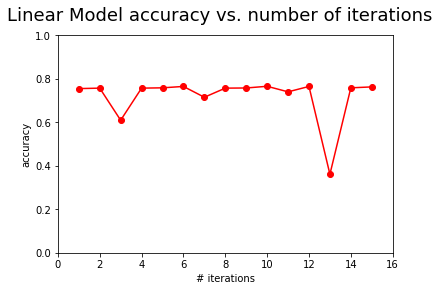

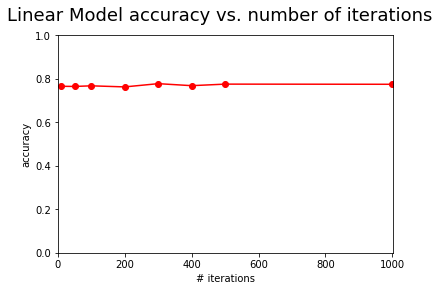

In [78]:
#Created a function that helps tune the maximum number of iterations in the linear model by plotting the 
#accuracies for various maximum number of iterations values
def tune_number_of_iterations(num_iterations):
    clf_accuracies = []

    for n in num_iterations:
        curr_accuracy = clf(n)
        clf_accuracies.append(curr_accuracy)

    plt.suptitle('Linear Model accuracy vs. number of iterations',fontsize=18)
    plt.xlabel('# iterations')
    plt.ylabel('accuracy')
    plt.plot(num_iterations,clf_accuracies,'ro-')
    plt.axis([0,num_iterations[-1]+1,0,1])

    plt.show()

#Prints out plots of the accuracies for various maximum number of iterations values    
tune_number_of_iterations([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
tune_number_of_iterations([10,50,100,200,300,400,500,1000])

In [80]:
#Print the accuracy of the best value for the parameter 
#in the k-Nearest-Neighbor model
kNN(8)

0.7842441447835344

In [81]:
#Print the accuracy of the best value for the parameter 
#in the decision tree model
dt(4)

0.7863733144073811

In [83]:
#Print the accuracy of the best value for the parameter 
#in the random forest model
rfc(30)

0.78708303761533

In [84]:
#Print the accuracy of the best value for the parameter 
#in the linear model
clf(300)

0.7778566359119943

In [85]:
clf(13)

0.36124911284599004